In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [30]:
%run ./main.py
import matplotlib.pyplot as plt

# Started at Mon, 13 Jul 2020 16:15:14 +0900 JST
# ===========================
# Python version:  3.7.0 (default, Jun 28 2018, 13:15:42)  [GCC 7.2.0]
# API version:  1013
# Platform:  linux
# ===========================
# Elapse time for preparation:  0.00028204917907714844  [sec]
# Preparaiton is done
# ===========================
# Ended at Mon, 13 Jul 2020 16:15:14 +0900 JST


<Figure size 432x288 with 0 Axes>

In [31]:
who

A	 Atomfield	 Atomfluence	 Atomtime	 Atomvolume	 E	 F	 F2f	 Hartree	 
J	 JF	 Make_fields	 PC	 aB	 cckt	 ch	 chbar	 ct	 
dcckt	 dcckt2cckt	 dt	 ec	 eckt	 ekt2thetakt	 ev	 evkt	 f	 
f2F	 fpi	 get_dcckt	 get_kpAt	 halfepsc	 ik	 jk	 k2ec	 k2ev	 
k2vc	 k2vv	 kpAt	 math	 nk	 np	 omega	 parameter_class	 pi	 
plt	 print_endtime	 print_footer	 print_header	 print_midtime	 sol	 sys	 t	 te	 
thetackt	 thetavkt	 time	 tpi	 ts	 tt	 vc	 vv	 zI	 



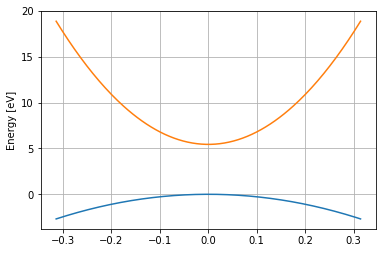

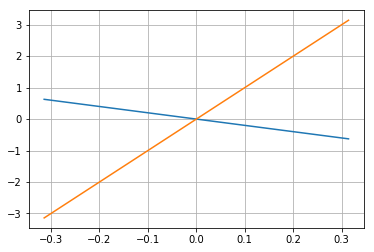

In [32]:
PC = parameter_class()
PC.Nt = 10000
PC.Nk = 200
PC.Ncycle = 100
PC.Make_kspace()
ev = k2ev(PC,PC.k)
ec = k2ec(PC,PC.k)
plt.figure()
plt.ylabel('Energy [eV]')
plt.plot(PC.k,ev*Hartree)
plt.plot(PC.k,ec*Hartree)
plt.grid()
plt.show()
#
vv = k2vv(PC,PC.k)
vc = k2vc(PC,PC.k)
plt.figure()
plt.plot(PC.k,vv)
plt.plot(PC.k,vc)
plt.grid()
plt.show()


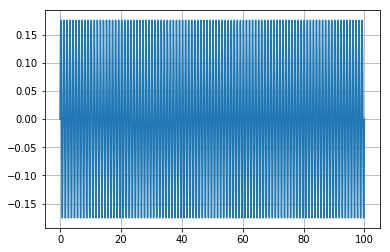

In [33]:
t, A, E= Make_fields(PC)
plt.figure()
plt.plot(t*PC.omegac/tpi,A)
plt.grid()
plt.show()

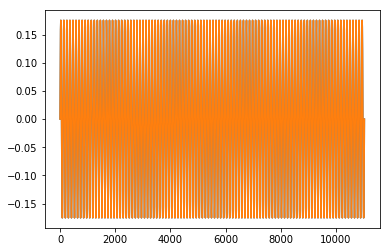

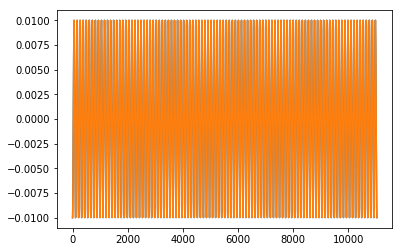

In [34]:
F = f2F(t,E.reshape([len(E),-1]))
plt.plot(t,A)
plt.plot(t,-F)
plt.show()
f = F2f(t,F)
plt.plot(t,E)
plt.plot(t,f)
plt.show()

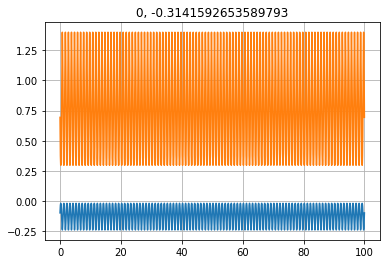

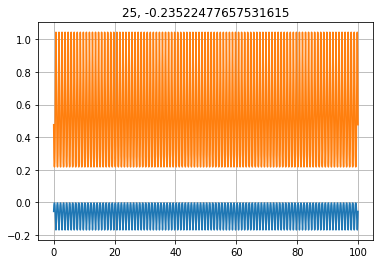

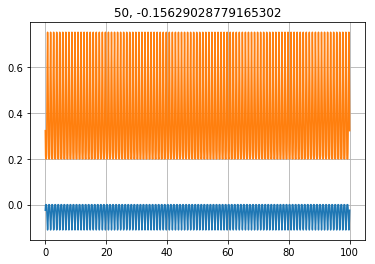

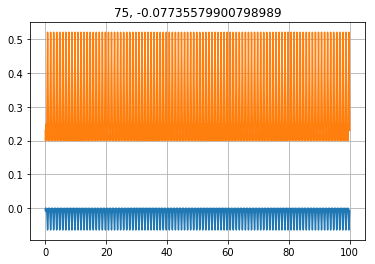

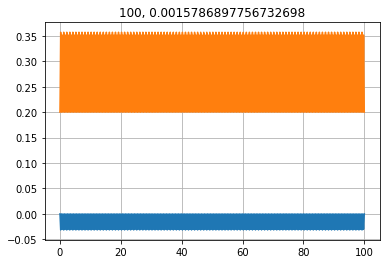

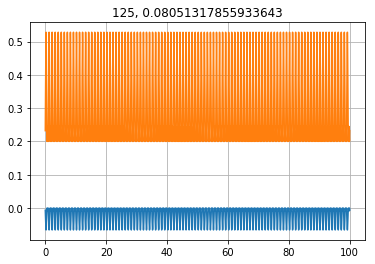

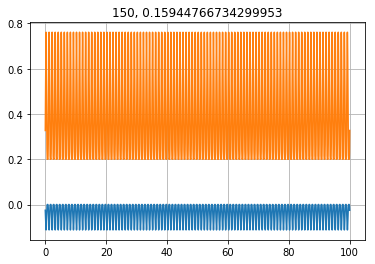

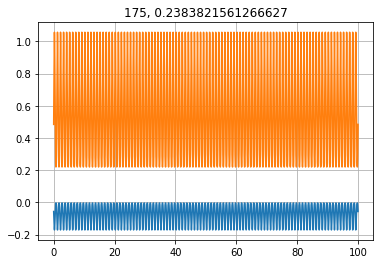

In [35]:
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(PC.k[nk]))
    plt.plot(t*PC.omegac/tpi,k2ev(PC,PC.k[nk] + A))
    plt.plot(t*PC.omegac/tpi,k2ec(PC,PC.k[nk] + A))
    plt.grid()
    plt.show()

0 200


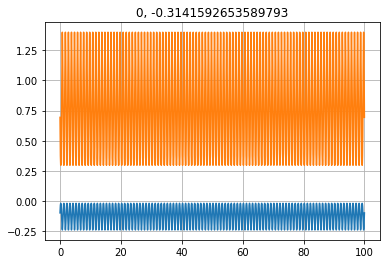

10 200


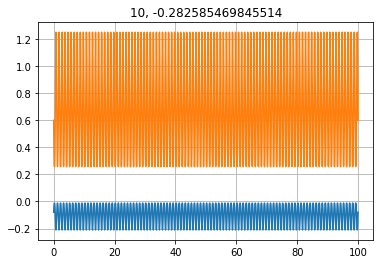

20 200


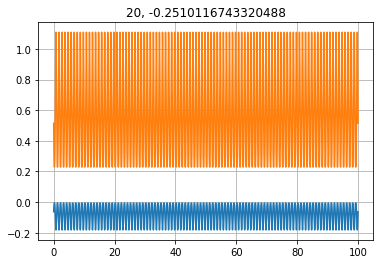

30 200


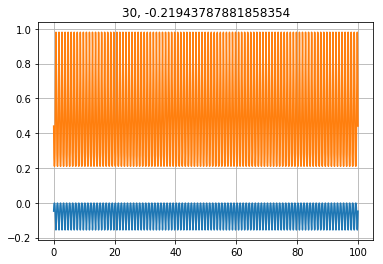

40 200


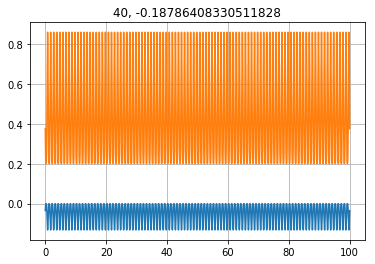

50 200


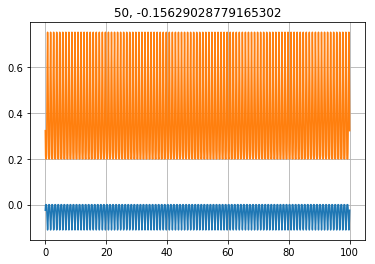

60 200


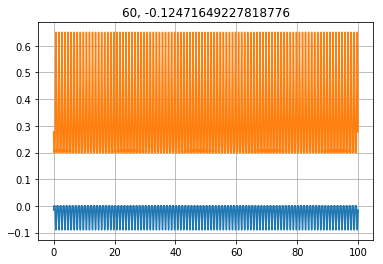

70 200


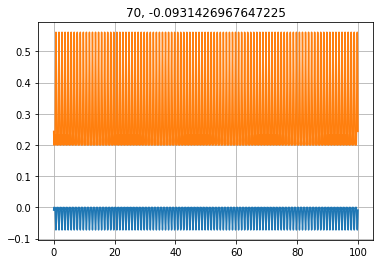

80 200


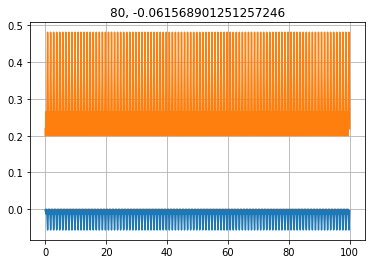

90 200


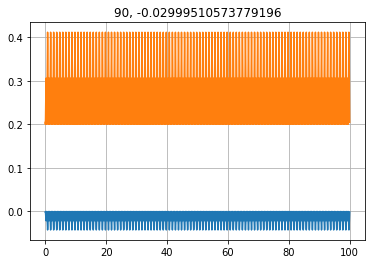

100 200


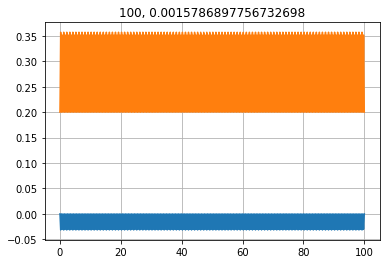

110 200


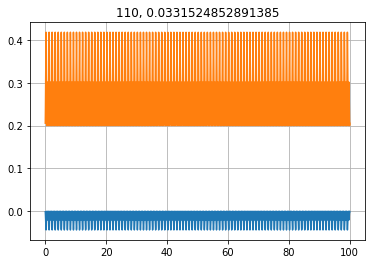

120 200


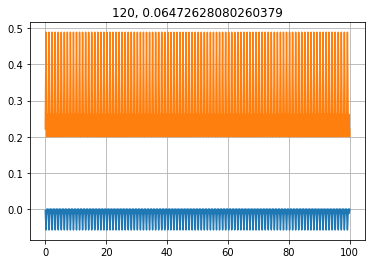

130 200


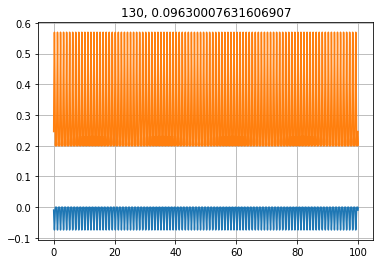

140 200


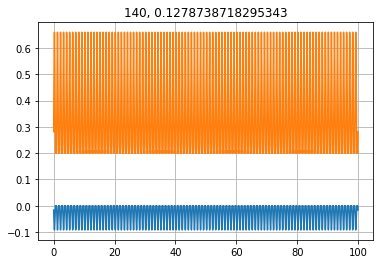

150 200


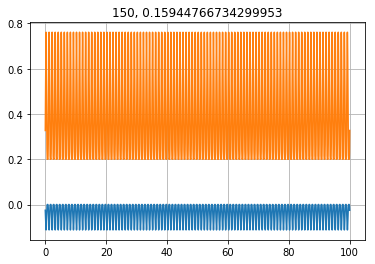

160 200


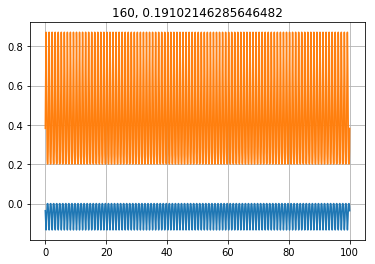

170 200


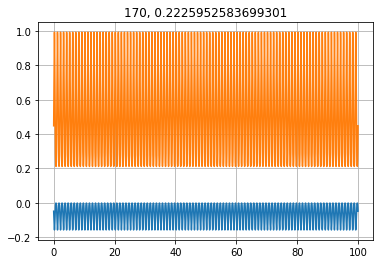

180 200


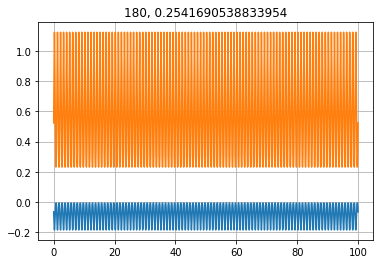

190 200


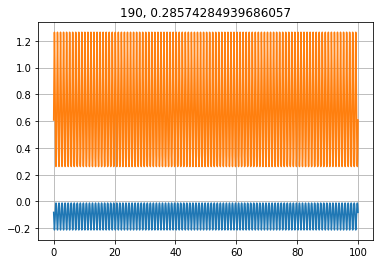

In [36]:
kpAt = get_kpAt(PC,A)
#
for nk in range(0,PC.Nk,PC.Nk//20):
    print(str(nk), str(PC.Nk))
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.plot(t*PC.omegac/tpi,k2ev(PC, kpAt[nk, :]))
    plt.plot(t*PC.omegac/tpi,k2ec(PC, kpAt[nk, :]))
    plt.grid()
    plt.show()

(200, 10000)


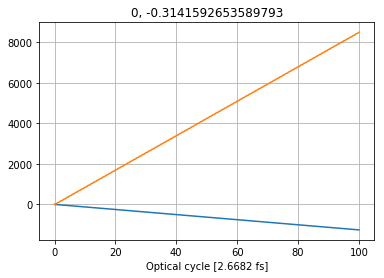

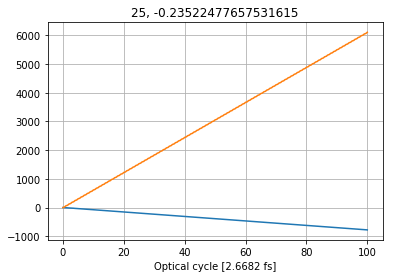

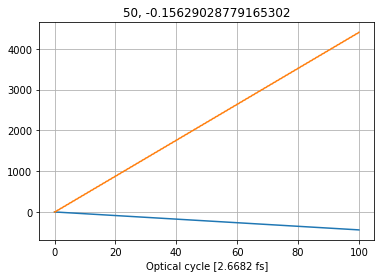

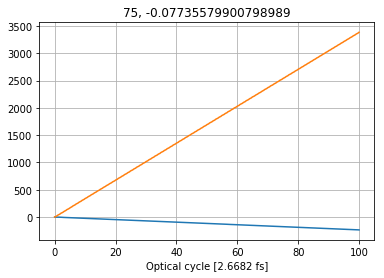

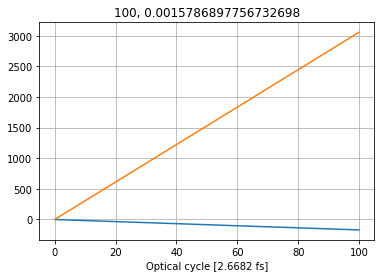

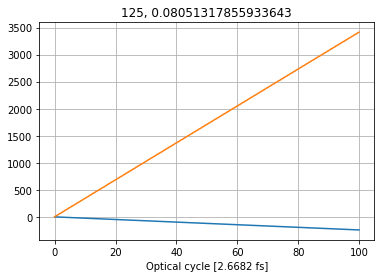

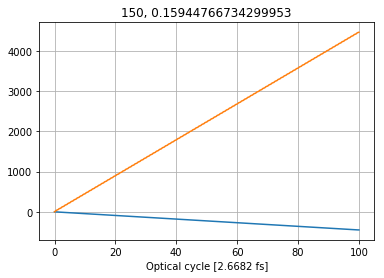

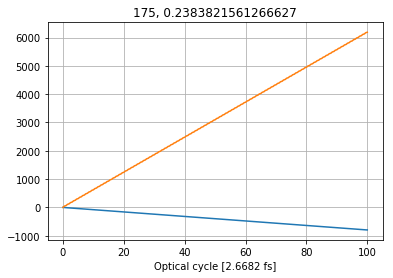

In [52]:
evkt = k2ev(PC,kpAt)
eckt = k2ec(PC,kpAt)
print(evkt.shape)
#
thetavkt = ekt2thetakt(PC, t, evkt)
thetackt = ekt2thetakt(PC, t, eckt)
#thetavkt = 0.0*evkt
#thetackt = 0.0*eckt
#for ik in range(PC.Nk):
#    thetavkt[ik, :] = f2F(t,evkt[ik, :])
#    thetackt[ik, :] = f2F(t,eckt[ik, :])
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.xlabel('Optical cycle ['+str(np.round(tpi/PC.omegac*Atomtime, decimals=4))+' fs]')
    plt.plot(t*PC.omegac/tpi,thetavkt[nk, :])
    plt.plot(t*PC.omegac/tpi,thetackt[nk, :])
    #plt.legend()
    plt.grid()
    plt.show()

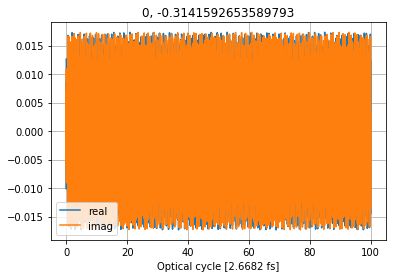

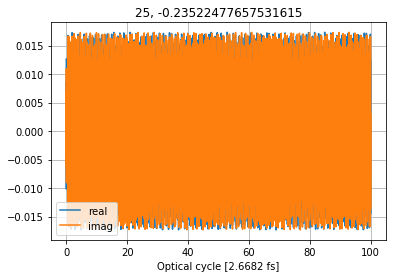

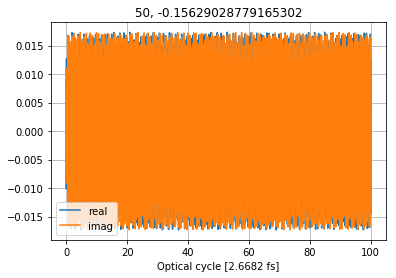

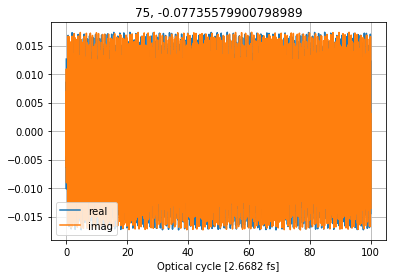

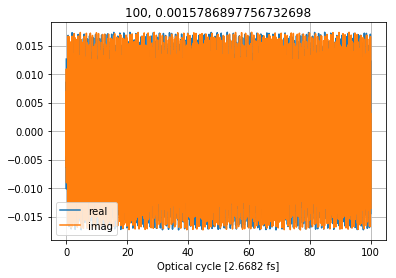

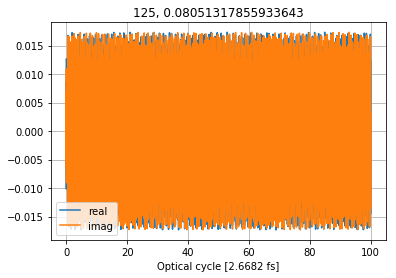

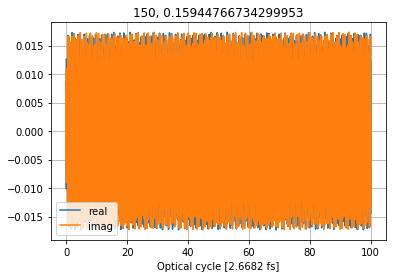

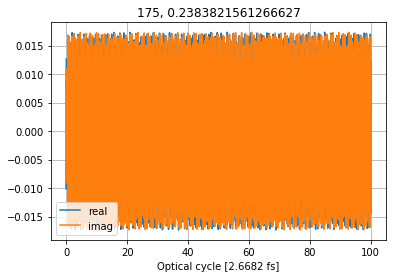

In [50]:
dcckt = get_dcckt(PC, thetavkt, thetackt, evkt, eckt, E)
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.xlabel('Optical cycle ['+str(np.round(tpi/PC.omegac*Atomtime, decimals=4))+' fs]')
    plt.plot(t*PC.omegac/tpi,np.real(dcckt[ik, :]), label='real')
    plt.plot(t*PC.omegac/tpi,np.imag(dcckt[ik, :]), label='imag')
    plt.legend()
    plt.grid()
    plt.show()

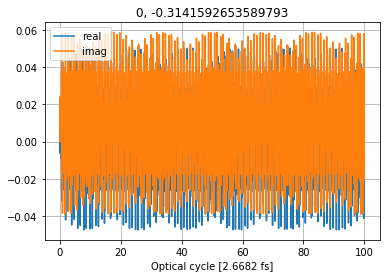

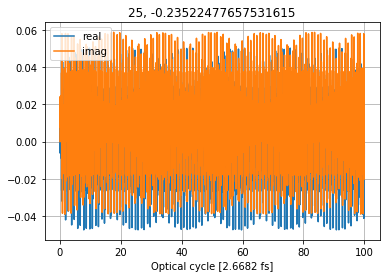

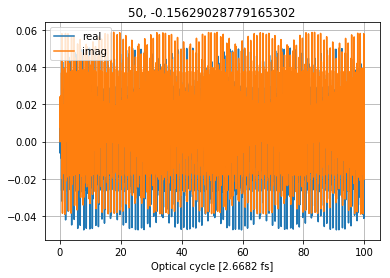

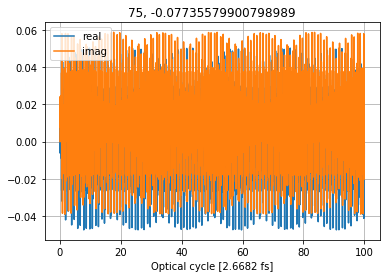

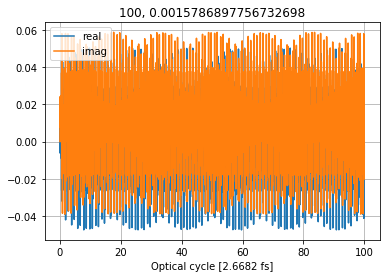

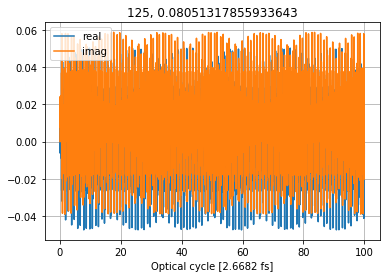

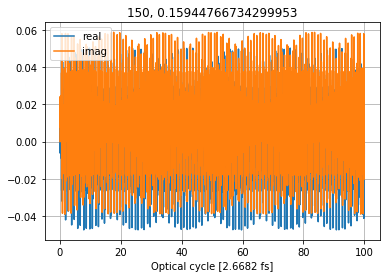

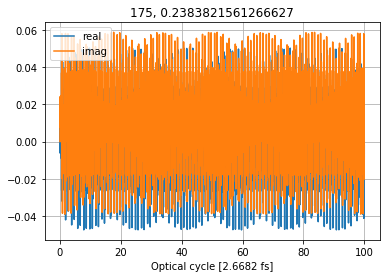

In [48]:
cckt = dcckt2cckt(PC, t, dcckt)
for nk in range(0,PC.Nk,PC.Nk//8):
    plt.figure()
    plt.title(str(nk)+', '+str(kpAt[nk, 0]))
    plt.xlabel('Optical cycle ['+str(np.round(tpi/PC.omegac*Atomtime, decimals=4))+' fs]')
    plt.plot(t*PC.omegac/tpi,np.real(cckt[ik, :]), label='real')
    plt.plot(t*PC.omegac/tpi,np.imag(cckt[ik, :]), label='imag')
    plt.grid()
    plt.legend()
    plt.show()

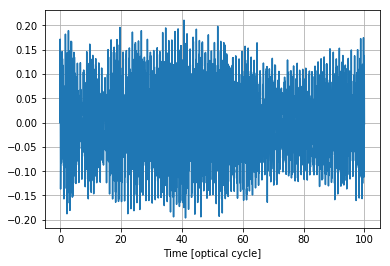

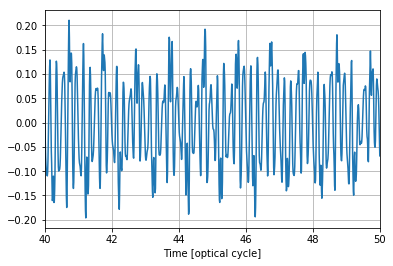

In [20]:
J = get_J(cckt,thetavkt,thetackt)
plt.figure()
plt.xlabel('Time [optical cycle]')
plt.plot(t*PC.omegac/tpi,J)
plt.grid()
plt.show()
plt.figure()
plt.xlim(40.0,50.0)
plt.xlabel('Time [optical cycle]')
plt.plot(t*PC.omegac/tpi,J)
plt.grid()
plt.show()

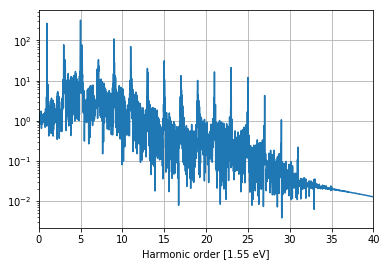

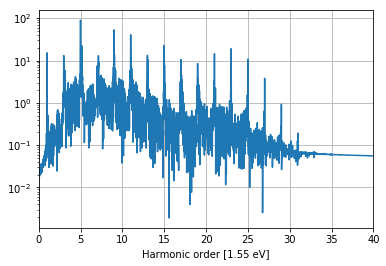

In [42]:
dt = t[1] - t[0]
omega = np.fft.fftfreq(PC.Nt)*(tpi/dt)
JF = np.fft.fft(J)
plt.figure()
plt.xlim(0.0,40.0)
plt.xlabel('Harmonic order [1.55 eV]')
plt.yscale('log')
plt.plot(omega[:PC.Nt//2]/PC.omegac,np.abs(JF[:PC.Nt//2]))
plt.grid()
plt.show()
a = F2f(t,J)
aF = np.fft.fft(a)
plt.xlim(0.0,40.0)
plt.xlabel('Harmonic order [1.55 eV]')
plt.yscale('log')
plt.plot(omega[:PC.Nt//2]/PC.omegac,np.abs(aF[:PC.Nt//2]))
plt.grid()
plt.show()
